### Load data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
from collections import Counter

data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv", decimal=',')
# data = data.replace(",", ".", regex=True) 
display(data.head(3))
print('data.shape:', data.shape)

data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label
data_X = data_X.to_numpy()
data_y = data_y.to_numpy()

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31


data.shape: (737453, 24)


In [2]:
# one day 
one_day = 4134
fig, axes = plt.subplots(len(data_X.columns)//4, 5, figsize=(20, 40))

i = 0
for triaxis in axes:
    for axis in triaxis:
        data_X[:one_day].hist(column = data_X.columns[i], bins = 100, ax=axis)
        i = i+1
        if i == len(data_X.columns):
            break

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### Split index

In [3]:
# train : validation : test = 3 : 1 : 1 = 60% : 20% : 20%
import numpy as np 
len_ = len(data_X)
# data
x_train, x_test = np.split(data_X, [int(.60 *len_)])
x_val, x_test = np.split(x_test, [int(.50 *len(x_test))])
# target
y_train, y_test = np.split(data_y, [int(.60 *len_)])
y_val, y_test = np.split(y_test, [int(.50 *len(y_test))])

print('x_train:', x_train.shape, ', y_train:', y_train.shape, 
    '\nx_val:  ', x_val.shape, ', y_val:  ', y_val.shape,
    '\nx_test: ', x_test.shape, ', y_test: ', y_test.shape)

x_train: (442471, 21) , y_train: (442471,) 
x_val:   (147491, 21) , y_val:   (147491,) 
x_test:  (147491, 21) , y_test:  (147491,)


In [4]:
# save
np.savetxt("x_train.csv", x_train, delimiter=",")
np.savetxt("x_val.csv", x_val, delimiter=",")
np.savetxt("x_test.csv", x_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_val.csv", y_val, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

### Plot label in time sequence
y_val 第12萬筆資料~第134,500筆的資料都是2.08，大約佔了快要10%，看大家要不要砍掉。  
x_data 就沒有此情形。

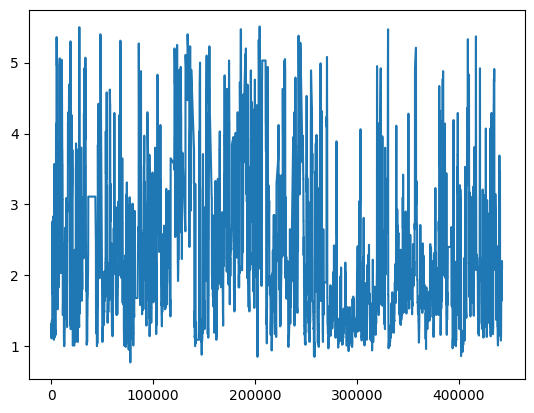

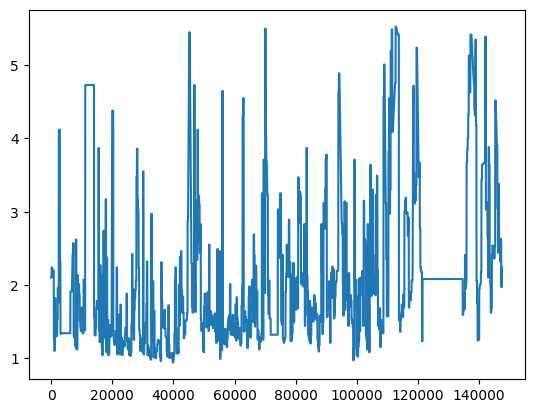

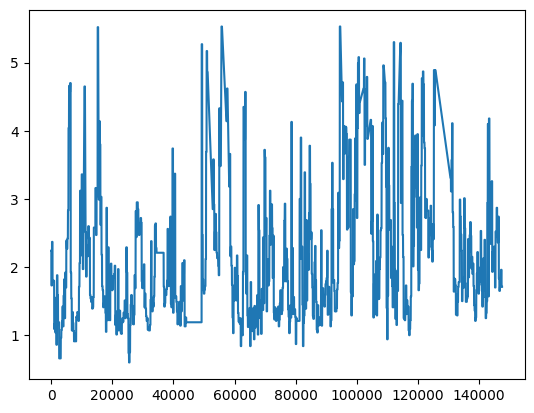

In [5]:
plt.plot(y_train)
plt.show()
plt.plot(y_val)
plt.show()
plt.plot(y_test)
plt.show()

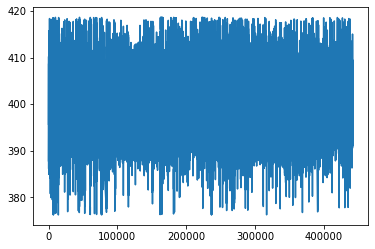

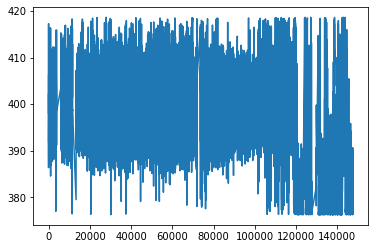

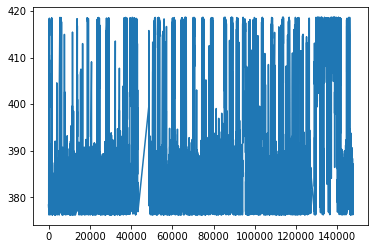

In [30]:
plt.plot(x_train[:,4])
plt.show()
plt.plot(x_val[:,4])
plt.show()
plt.plot(x_test[:,4])
plt.show()

### Apply Normalization to data
用 x_train 的資料當作基準，調整為平均值0，標準差1，因為我們無法偷看 x_val 和 x_test。

In [6]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()
scaler.fit(x_train)

print(scaler.transform([x_train[0]])) # test a record
print(scaler.transform(x_val[0:2])) # test 2 records
# scaler.inverse_transform() # Scale back the data to the original representation.

[[-0.51012939  0.61159978  0.2922999   0.79226618 -0.83036648  1.02694416
   0.82409341 -0.74839536 -0.5103656  -0.73077174 -1.6011553   1.61305069
  -1.33949426 -1.33009956 -0.57614505 -0.71414582 -0.75856797  0.31011986
   1.02337725  0.18600695  1.23914005]]
[[-0.39795545 -0.03163431 -0.00701314  0.13850528  0.30265508 -0.29715151
   0.48109881  0.77582119  0.77315978  0.83516345  0.1593067   0.59876316
   0.83451733  0.39738592 -0.78987555 -0.86947685 -0.64166585 -0.42340426
  -0.23833704 -0.18539559 -0.32356688]
 [-0.39795545 -0.03163431  0.05440659  0.21077305 -0.77581227 -0.29780717
   0.47640026  0.78187893  0.81218718  0.84223641  0.17660751  0.3059158
   0.27703981  0.55185109 -0.95986237 -0.85148542 -0.69354866 -0.41887555
  -0.07352846 -0.28276238 -0.22585203]]


In [7]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

# And now to load...

scaler = joblib.load(scaler_filename) 

可以看到 x_test_norm 的分佈偏y軸下方，與 train, val 不太一樣。

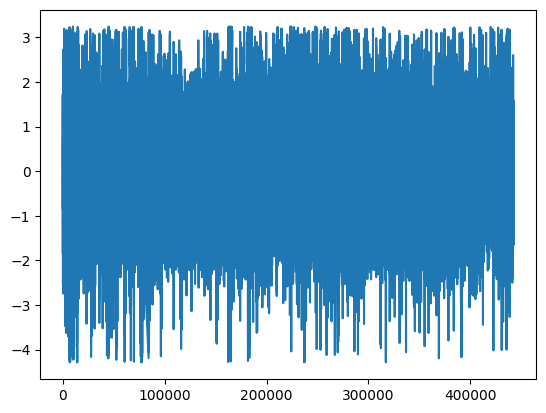

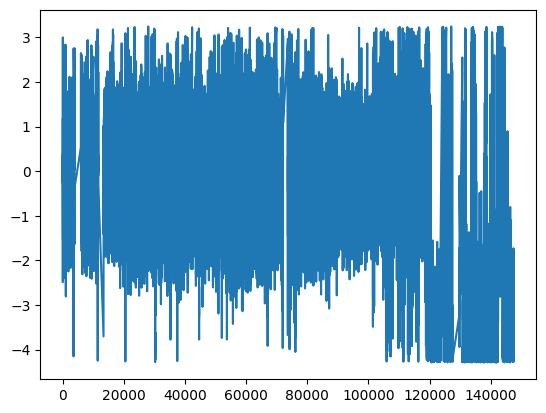

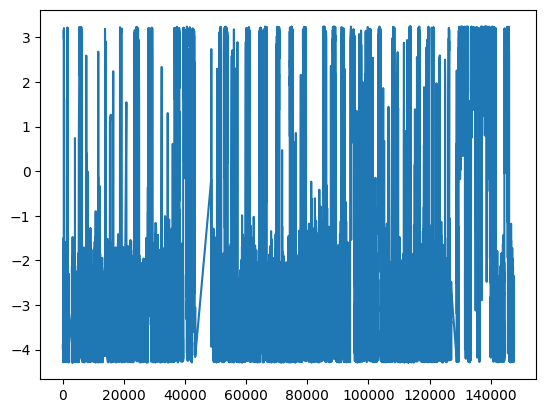

In [8]:
x_train_norm = scaler.transform(x_train)
x_val_norm = scaler.transform(x_val)
x_test_norm = scaler.transform(x_test)
plt.plot(x_train_norm[:,4])
plt.show()
plt.plot(x_val_norm[:,4])
plt.show()
plt.plot(x_test_norm[:,4])
plt.show()

In [9]:
# save
np.savetxt("x_train_norm.csv", x_train_norm, delimiter=",")
np.savetxt("x_val_norm.csv", x_val_norm, delimiter=",")
np.savetxt("x_test_norm.csv", x_test_norm, delimiter=",")

接下來對 y 做 log2，拉小 outlier 的範圍

origin y_train: [1.31 1.31 1.31 1.31 1.31]
adjusted y_train (log2): [0.38956681 0.38956681 0.38956681 0.38956681 0.38956681]
inverse y_train: [1.31 1.31 1.31 1.31 1.31]


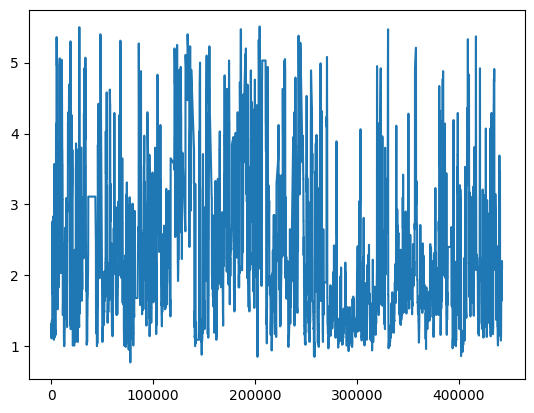

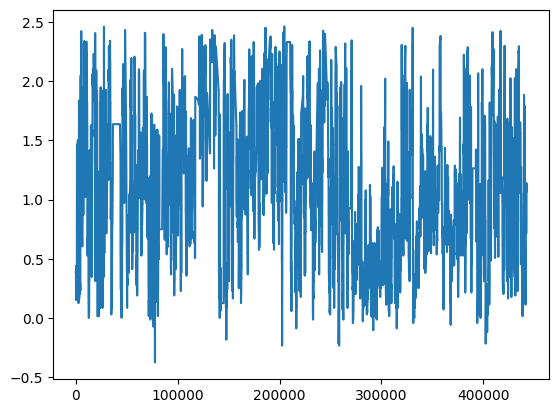

In [10]:
from math import log2
y_train_log = np.array([log2(yi) for yi in y_train])
inverse_y_train = np.array([2**ylog for ylog in y_train_log])
print('origin y_train:', y_train[:5])
print('adjusted y_train (log2):',  y_train_log[:5])
print('inverse y_train:', inverse_y_train[:5])
plt.plot(y_train)
plt.show()
plt.plot(y_train_log)
plt.show()

In [11]:
y_train_log = np.array([log2(yi) for yi in y_train])
y_val_log = np.array([log2(yi) for yi in y_val])
y_test_log = np.array([log2(yi) for yi in y_test])
np.savetxt("y_train_log.csv", y_train_log, delimiter=",")
np.savetxt("y_val_log.csv", y_val_log, delimiter=",")
np.savetxt("y_test_log.csv", y_test_log, delimiter=",")

In [19]:
### 計算 y 的平均數和標準差
ydata_list = [y_train, y_val, y_test, y_train_log, y_val_log, y_test_log]
ydata_name = ["y_train", "y_val", "y_test", "y_train_log", "y_val_log", "y_test_log"]
for i, ydata in enumerate(ydata_list):
    mean = np.mean(ydata)
    std = np.std(ydata)
    print(f'{ydata_name[i]:12}: mean {mean}, std {std}')

y_train     : mean 2.397747739399871, std 1.1303980457890859
y_val       : mean 2.1467903804299926, std 1.0680519866679348
y_test      : mean 2.2937836206955002, std 1.1452587242349639
y_train_log : mean 1.1090637032703092, std 0.6606808685776089
y_val_log   : mean 0.9565085519270318, std 0.621822942883582
y_test_log  : mean 1.0321856691910376, std 0.6823160196464662
